In [10]:
import pickle
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np
import random
import json
import os
import re
import seaborn as sns
import math

In [23]:
def read_data(algo='cm', row=3, width=4096, level=1, seed=1, count=1, flowkey='srcIP', 
              epochs=['10'], dataset='caida20180816_3_zipf2a_7.pcap', type='accumulate.txt', window_size=500, k=10):
    res = []
    for epoch in epochs:
        
        path = f"../lstm/SketchPatternQuery/{algo}/{dataset}/"\
                f"{flowkey}/row_{row}_width_{width}_level_{level}_epoch_{epoch}_count_{count}_seed_{seed}/"
        
        for dir in sorted(os.listdir(path)):
            p = os.path.join(path, dir)
            if os.path.isdir(p): 
                window_dir = "window_" + str(window_size)
                full_path = os.path.join(path, dir, window_dir, type)    
                cnt = 0
                with open(full_path, 'r') as f:
                    for line in f:
                        num_str = re.match(r'\(srcIP = +(\d+\.\d+\.\d+\.\d+)\) +(.+)', line).group(2)
                        num_list = [int(num) for num in num_str.split()]
                        # print(num_list)
                        res.append(num_list)
                        cnt += 1
                        if cnt >= k:
                            break
        
        res_sum = [sum(col) for col in zip(*res)]
            
    return res, res_sum
    # return res_sum

read_data()

([[0,
   445,
   887,
   1350,
   1721,
   2701,
   2923,
   4000,
   15027,
   17464,
   19640,
   23936,
   24659,
   28794,
   29554,
   30682,
   31275,
   32523,
   34326,
   35896,
   38170],
  [0,
   667,
   863,
   1219,
   1294,
   1631,
   1873,
   3586,
   5080,
   6427,
   8421,
   9925,
   11437,
   13231,
   14668,
   16077,
   17894,
   19158,
   20883,
   22456,
   24044],
  [0,
   205,
   563,
   1058,
   1381,
   1730,
   2301,
   3132,
   4199,
   4833,
   5412,
   6385,
   7990,
   9429,
   11710,
   12858,
   14237,
   15989,
   17894,
   19936,
   20913],
  [0,
   35,
   68,
   103,
   126,
   147,
   175,
   586,
   1417,
   5207,
   7662,
   8284,
   11722,
   13221,
   13645,
   14603,
   14605,
   14609,
   17367,
   17371,
   17375],
  [0,
   235,
   500,
   751,
   998,
   1254,
   1478,
   2643,
   3830,
   4984,
   6140,
   7273,
   8104,
   9153,
   10329,
   11447,
   12541,
   13644,
   14798,
   15888,
   16819],
  [0,
   3014,
   5358,
   8584,
   113

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 'TopK_sum', 'TopK_var'] 12
[[0, 3014, 5358, 8584, 11336, 13930, 16359, 19788, 23025, 26161, 29196, 32913, 36017, 38744, 41530, 44370, 47340, 47361, 47379, 47397, 47409], [0, 445, 887, 1350, 1721, 2701, 2923, 5323, 5637, 6410, 6750, 7039, 7538, 7734, 9648, 10263, 10735, 11812, 22839, 25276, 27449], [0, 1473, 1848, 4119, 4454, 5923, 7436, 10373, 11441, 12828, 13809, 14845, 16320, 17793, 20732, 22242, 22894, 22897, 22899, 22901, 22905], [0, 1233, 2293, 2645, 2917, 4131, 5069, 6606, 7360, 8243, 9722, 10692, 11818, 12912, 14073, 15177, 16135, 16137, 16137, 16138, 16143], [0, 692, 1386, 1689, 3525, 5281, 6784, 7963, 8447, 9796, 9800, 12721, 12737, 12750, 13302, 15302, 15712, 15724, 15734, 15741, 15755], [0, 982, 1948, 2903, 3853, 5020, 6181, 7161, 8131, 9094, 10056, 10993, 11846, 12742, 13559, 14396, 15312, 15312, 15314, 15315, 15316], [0, 983, 1877, 2940, 3867, 4839, 6043, 6872, 7645, 8519, 9370, 10448, 11403, 12393, 13504, 14280, 15229, 15230, 15237, 15238, 1

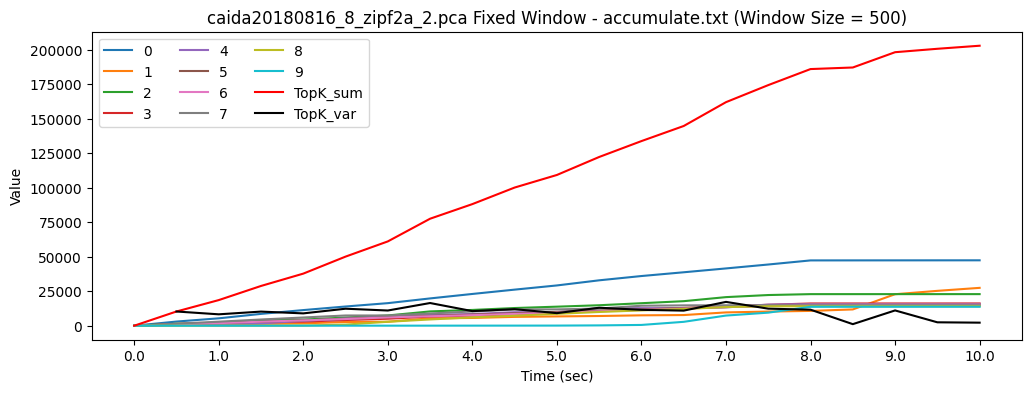

In [81]:
## parameters

name1 = ["zipf2a", "zipf4", "zipf2b"]
name2 = ["caida20180816", "caida20180517"]

lens = [["3", "7"],
        ["4", "6"],
        ["5", "5"],
        ["6", "4"],
        ["7", "3"],
        ["8", "2"],]

pcap_file = []


# # caida + caida
for l in lens:
    name = f'{name2[0]}_{l[0]}_{name2[1]}_{l[1]}.pcap'
    pcap_file.append(name)

    
# single dataset
# pcap_file.append("caida20180517_10_caida20180816_0.pcap")
# pcap_file.append("caida20180816_10_caida20180816_0.pcap")
# pcap_file.append("zipf2a_10_caida20180816_0.pcap") 
# pcap_file.append("zipf2b_10_caida20180816_0.pcap") 
# pcap_file.append("zipf4_10_caida20180816_0.pcap")


# # caida + zipf
# for n1 in name1:
#     for l in lens:
#         name = f'{name2[0]}_{l[0]}_{n1}_{l[1]}.pcap'
#         pcap_file.append(name)


# # zipf + caida
# for n1 in name1:
#     for n2 in name2:
#         for l in lens:
#             name = f'{n1}_{l[0]}_{n2}_{l[1]}.pcap'
#             pcap_file.append(name)

print(pcap_file)    
print(f'Total Pcap File Number: {len(pcap_file)}')
# widths = [2048, 4096, 8192, 16384, 32768, 65536, 131072]
widths = [4096]



['caida20180816_3_caida20180517_7.pcap', 'caida20180816_4_caida20180517_6.pcap', 'caida20180816_5_caida20180517_5.pcap', 'caida20180816_6_caida20180517_4.pcap', 'caida20180816_7_caida20180517_3.pcap', 'caida20180816_8_caida20180517_2.pcap']
Total Pcap File Number: 6


In [82]:
def changing_time_predict(algo='cm', row=3, width=[4096], level=1, seed=1, count=1, flowkey='srcIP', 
              epochs=['10'], datasets=['zipf2a_3_caida20180517_7.pcap'], type_="accumulate.txt", window_size=200, k=10):
    
    res_sum = {}
    res_var = {}
    res_sec_var = {}
    label = []
    answer = []
    
    for d in datasets:
        for w in width:
            name = f'{d[:-5]}_{w}'
            res_var[name] = [None]
            res_sec_var[name] = [None, None]
            
            _, result_sum = read_data(algo, row, w, level, seed, count, flowkey, epochs, d, type_, window_size, k)

            label.append(name)
            answer.append(int(d.split('_')[1]))
            
            res_sum[name] = result_sum
            for i in range(1, len(result_sum)):
                res_var[name].append(result_sum[i] - result_sum[i-1])
            for i in range(2, len(res_var[name])):
                res_sec_var[name].append(abs(res_var[name][i] - res_var[name][i-1]))
            
    # res = read_data(algo, row, width, level, seed, count, flowkey, epochs, dataset, type, window_size)
    # print(label, len(label))
    # print(res_sum, len(res_sum))
    # print(res_var, len(res_var))
    # print(res_sec_var, len(res_sec_var))
    
    # print(answer)
    pred = []
    for i in range(len(label)):
        var_max = max(res_var[label[i]][1:])
        var_avg = sum(res_var[label[i]][1:]) / len(res_var[label[i]][1:])
        var_diff = var_max - var_avg
        # print(var_max, var_avg, var_diff)
        max_idx = 2
        max_val = -1
        for j in range(2, len(res_sec_var[label[i]])):
            if res_sec_var[label[i]][j] > max_val:
                max_val = res_sec_var[label[i]][j] 
                max_idx = j
                
        pred.append((max_idx-1)*window_size/1000)
        
        print(i)
        print(label[i])
        print(var_max, var_avg, var_diff)
        print(max(res_sec_var[label[i]][2:]), sum(res_sec_var[label[i]][2:]) / len(res_sec_var[label[i]][2:]), max(res_sec_var[label[i]][2:]) - (sum(res_sec_var[label[i]][2:]) / len(res_sec_var[label[i]][2:])))
        print(pred[i], answer[i])
        print()
        # else:
        #     pred.append(0)
            
            
    # for i in range(len(answer)):
    #     print(f'{label[i]}: pred - {pred[i]}, true - {answer[i]} ==> diff - {pred[i] - answer[i]}')
            
    
    
    
changing_time_predict(width=widths, datasets=pcap_file)


0
caida20180816_3_caida20180517_7_4096
8928 4867.166666666667 4060.833333333333
5274 851.1276595744681 4422.872340425532
3.0 3

1
caida20180816_4_caida20180517_6_4096
8928 4369.208333333333 4558.791666666667
5155 817.6808510638298 4337.319148936171
4.0 4

2
caida20180816_5_caida20180517_5_4096
10258 3975.6666666666665 6282.333333333334
6809 1063.1489361702127 5745.851063829788
5.0 5

3
caida20180816_6_caida20180517_4_4096
6718 3627.9583333333335 3090.0416666666665
3096 1090.6170212765958 2005.3829787234042
6.8 6

4
caida20180816_7_caida20180517_3_4096
6447 3827.4791666666665 2619.5208333333335
3077 946.1276595744681 2130.872340425532
7.8 7

5
caida20180816_8_caida20180517_2_4096
7193 4109.104166666667 3083.895833333333
3190 1003.7446808510638 2186.255319148936
8.0 8



[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 'TopK_sum', 'TopK_sec_var'] 12
[[0, 7, 10, 13, 31, 45, 63, 64, 70, 76, 80, 84, 90, 101, 110, 128, 1210, 2193, 2963, 4475, 5556, 6539, 7537, 8344, 9464, 10704, 11652, 12603, 13950, 15224, 16580, 17802, 19079, 20476, 22259, 23728, 25733, 27178, 28663, 30301, 31684, 32713, 34542, 36399, 37870, 39365, 40758, 41903, 42419], [0, 7, 14, 22, 26, 33, 36, 46, 58, 65, 79, 89, 101, 106, 121, 129, 400, 755, 1067, 1715, 2169, 2408, 2696, 3158, 3759, 4286, 5033, 6114, 7253, 7447, 7705, 7965, 8288, 8804, 9474, 10113, 10498, 11093, 11770, 12315, 13291, 14452, 15899, 16984, 18952, 20343, 20350, 22881, 24357], [0, 10, 15, 17, 30, 37, 37, 51, 54, 56, 70, 72, 80, 90, 108, 118, 766, 1455, 1909, 2776, 3460, 4049, 4533, 5118, 5535, 5934, 6405, 6912, 7429, 8147, 9023, 9526, 10232, 10881, 11617, 12521, 13344, 14372, 15126, 15694, 16525, 17309, 17872, 18584, 19623, 20982, 21952, 22496, 23011], [0, 4, 8, 12, 15, 17, 17, 17, 17, 18, 19, 19, 19, 19, 19, 20, 2015, 2414, 2416, 2418, 242

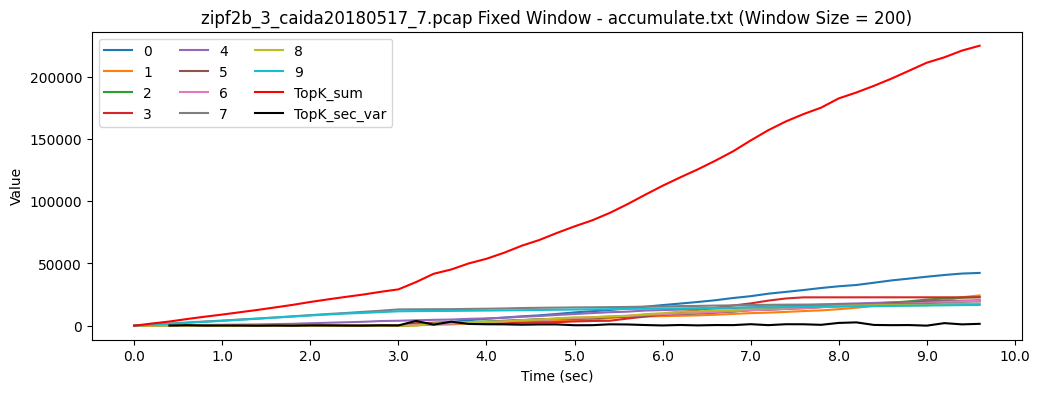

In [76]:
def plot_single(algo='cm', row=3, width=4096, level=1, seed=1, count=1, flowkey='srcIP', 
              epochs=['10'], dataset='zipf2a_3_caida20180517_7.pcap', type_="accumulate.txt", window_size=500, k=10):
    
    labels = [i for i in range(10)]
    res = []

    result, result_sum = read_data(algo, row, width, level, seed, count, flowkey, epochs, dataset, type_, window_size, k)
    
    for r in result:
        res.append(r)
    
    result_var = [None]
    for i in range(1, len(result_sum)):
        result_var.append(result_sum[i] - result_sum[i-1])
        
    result_sec_var = [None, None]
    for i in range(2, len(result_var)):
        result_sec_var.append(abs(result_var[i] - result_var[i-1]))
        
    labels.append("TopK_sum")
    # labels.append("TopK_var")
    labels.append("TopK_sec_var")
    res.append(result_sum)
    # res.append(result_var)
    res.append(result_sec_var)
    
            
            
    # res = read_data(algo, row, width, level, seed, count, flowkey, epochs, dataset, type, window_size)
    print(labels, len(labels))
    print(res, len(res))
    print(result_var, len(result_var))
    print(result_sec_var, len(result_sec_var))
    print(f'max: {max(result_var[1:])}, avg: {sum(result_var[1:])/len(result_var[1:])}, diff: {max(result_var[1:]) - (sum(result_var[1:])/len(result_var[1:]))}')
    
    plt.figure(figsize=(12, 4))
    
    # sns.lineplot(data=res, dashes=False, markers=True, markersize=4)
    # for i, data_set in enumerate(res):
    #     plt.plot(range(1,21), data_set, label=f'Data Set {i + 1}')
        
    print(dataset)
    for i in range(len(res)):
        if i == len(res)-2:
            plt.plot(res[i], label=labels[i], c="red")
        elif i == len(res)-1:
            plt.plot(res[i], label=labels[i], c="black")
        else:
            plt.plot(res[i], label=labels[i])
        

    # Add labels and legend
    plt.xlabel('Time (sec)')
    plt.ylabel('Value')
    plt.title('%s Fixed Window - %s (Window Size = %d)' % (dataset, type_, window_size))
    # plt.axhline(10000, c="black")
    ticks = [i for i in range(int(10*1000/window_size) + 1)]
    adjusted_ticks = [tick * (window_size / 1000) for tick in ticks[0::int(1000 / window_size)]]
    plt.xticks(ticks[0::int(1000/window_size)], adjusted_ticks)
    plt.legend(loc='upper left', ncol=math.ceil(len(res)/4))

    # Show the plot
    plt.show()
    

# datasets = ['10_0.pcap/', '5_5.pcap/', '4_6.pcap/', '3_7.pcap/']
# datasets = ["caida20180816_8_zipf2a_2.pcap"]
# window_sizes = [100, 200, 500]
window_sizes = [200]
plot_single(dataset=pcap_file[30], type_="accumulate.txt", window_size=window_sizes[0])
# plot_single(dataset=datasets[1], type_="accumulate.txt")
# plot_single(type_="variation.txt")
# plot_single(type_="second_variation.txt")